In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

# input data -costants
cm = 10 #nF/mm^2
gl = 1.0 #microS/mm^2
El = -70 #mV
Eex = 0
Vth = -54 #mV
Vreset = -80 #mV
tau_ex = 10 #ms
delta_gex = 0.5 # uS/mm^2

# simulation times
dt = 0.1 #ms
t_range = np.arange(0, 600, dt)

# spike times
spike_times = [100, 200, 230, 300, 320, 400, 410]

# init voltage, g-ex and I-ex
V_t = np.zeros(len(t_range))
g_ex = np.zeros(len(t_range))
I_ex = np.zeros(len(t_range))

# initial condition
V_t[0] = El

for ii in range(1,len(t_range)):

    t = t_range[ii]

    for s in spike_times:
        if abs(t - s) < dt/2:
            print(t)
            g_ex[ii-1] += delta_gex

    # get excitatory conductance 
    dgex = - g_ex[ii-1]/tau_ex 
    g_ex[ii] = g_ex[ii-1] + dt * dgex


    # get voltage
    dV = (-gl * (V_t[ii-1] - El) - g_ex[ii] * (V_t[ii-1] - Eex)) / cm
    V_t[ii] = V_t[ii-1] + dt * dV

    # check if it spiked
    if V_t[ii] >= Vth:
        V_t[ii] = Vreset
        
    # get synaptic current
    I_ex[ii] =  g_ex[ii]*(V_t[ii-1]-Eex)


100.0
200.0
230.0
300.0
320.0
400.0
410.0


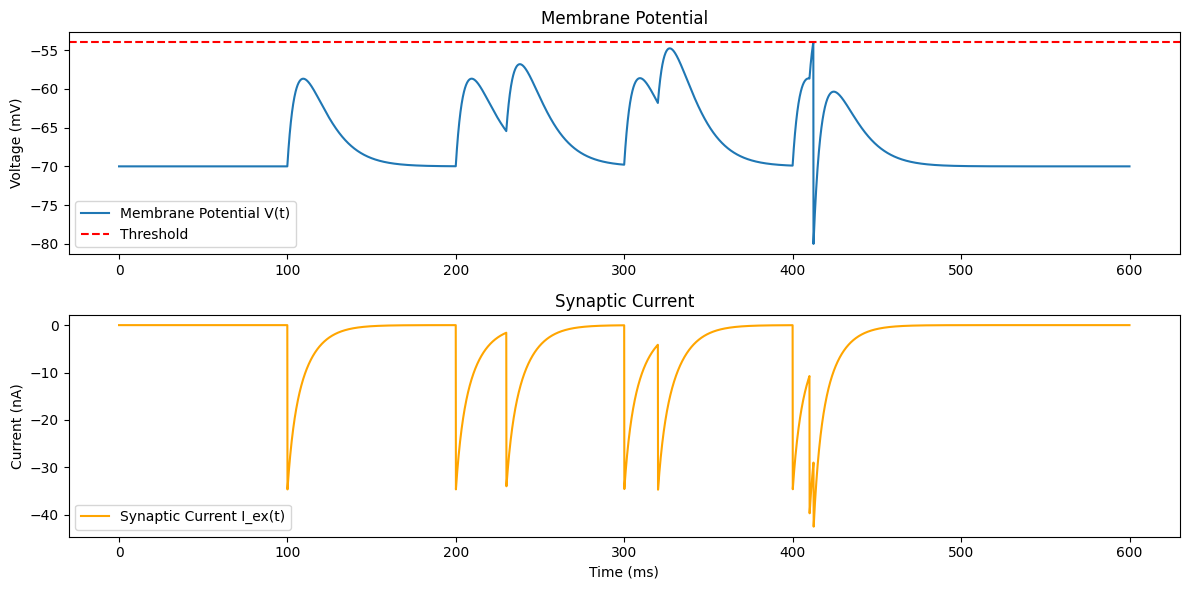

In [10]:
plt.figure(figsize=(12, 6))

# Voltage trace
plt.subplot(2, 1, 1)
plt.plot(t_range, V_t, label='Membrane Potential V(t)')
plt.axhline(Vth, color='r', linestyle='--', label='Threshold')
plt.title('Membrane Potential')
plt.ylabel('Voltage (mV)')
plt.legend()

# Synaptic current
plt.subplot(2, 1, 2)
plt.plot(t_range, I_ex, label='Synaptic Current I_ex(t)', color='orange')
plt.title('Synaptic Current')
plt.xlabel('Time (ms)')
plt.ylabel('Current (nA)')
plt.legend()

plt.tight_layout()
plt.show()
